In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas.tools import sjoin
from fiona.crs import from_epsg
from descartes.patch import PolygonPatch
from shapely.geometry import Point, Polygon

In [2]:
# using Singapore subzone-census
# set the filepath and load in a shapefile
map_df = gpd.read_file('../Capstone_Project /subzone-census-2010/subzone-census2010-shp/')

#data type is a GEOdataframe (not a normal dataframe)
type(map_df)

geopandas.geodataframe.GeoDataFrame

In [3]:
# View GEOdataframe
map_df.head(10)

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,7,MAXWELL,DTSZ07,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,5E3B7679E895F85B,2014-05-02,29392.0489,29096.7515,1419.802555,6.366418e+04,"POLYGON ((29537.863 29134.544, 29522.459 29103..."
1,2,1,TANGLIN,ORSZ01,Y,ORCHARD,OR,CENTRAL REGION,CR,3EC2B9D55537C009,2014-05-02,27162.8757,31905.7324,1864.488709,1.675371e+05,"POLYGON ((27418.706 31881.413, 27410.555 31879..."
2,3,2,BOULEVARD,ORSZ02,Y,ORCHARD,OR,CENTRAL REGION,CR,0937E2A5F54A1C53,2014-05-02,27916.9271,31967.0064,4109.231492,4.605504e+05,"POLYGON ((28366.552 31855.703, 28359.125 31841..."
3,4,3,SOMERSET,ORSZ03,Y,ORCHARD,OR,CENTRAL REGION,CR,1C1A0326CE13A8B1,2014-05-02,28626.5610,31494.9048,3039.805140,3.294379e+05,"POLYGON ((28882.434 31681.820, 28882.436 31681..."
4,5,3,PASIR RIS TOWN,PRSZ03,N,PASIR RIS,PR,EAST REGION,ER,37EABA55C9A79089,2014-05-02,40755.8307,39341.7432,5273.291429,1.511612e+06,"POLYGON ((41290.234 39671.558, 41291.480 39656..."
5,6,2,MACPHERSON,GLSZ02,N,GEYLANG,GL,CENTRAL REGION,CR,732CC6D2DCC784CF,2014-05-02,33774.3483,34399.1614,4585.788180,1.263409e+06,"POLYGON ((34415.029 33909.481, 34357.250 33893..."
6,7,5,GEYLANG EAST,GLSZ05,N,GEYLANG,GL,CENTRAL REGION,CR,84A21DC72BA5355B,2014-05-02,35237.5581,33246.2579,7027.740482,2.580431e+06,"POLYGON ((35987.194 33319.391, 36001.551 33245..."
7,8,4,ALJUNIED,GLSZ04,N,GEYLANG,GL,CENTRAL REGION,CR,EA9A22F6E41806C7,2014-05-02,33595.4531,32968.2268,7049.124464,2.945506e+06,"POLYGON ((34277.234 32322.636, 34282.432 32306..."
8,9,1,KALLANG WAY,GLSZ01,N,GEYLANG,GL,CENTRAL REGION,CR,B84D516ABCD6BC9C,2014-05-02,32763.7117,34222.9932,4066.569474,9.754296e+05,"POLYGON ((33353.539 33865.195, 32740.946 33592..."
9,10,6,DEFU INDUSTRIAL PARK,HGSZ06,N,HOUGANG,HG,NORTH-EAST REGION,NER,12D3314286C3A2DD,2014-05-02,34951.8462,37091.0827,8531.232623,1.971415e+06,"POLYGON ((35643.945 37699.182, 35643.926 37699..."


In [4]:
map_df.shape

(311, 16)

In [5]:
map_df.SUBZONE_N.unique

<bound method Series.unique of 0             MAXWELL
1             TANGLIN
2           BOULEVARD
3            SOMERSET
4      PASIR RIS TOWN
            ...      
306            NASSIM
307           DUNEARN
308            RIDOUT
309          MOULMEIN
310      STRAITS VIEW
Name: SUBZONE_N, Length: 311, dtype: object>

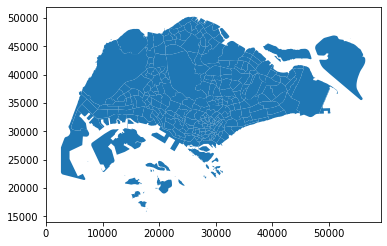

In [6]:
map_df.plot()

In [7]:
# using Singapore subzone-census
# set the filepath and load in a shapefile
map_df_2 = gpd.read_file('../Capstone_Project /planning-area-census2010/planning-area-census2010-shp/Planning_Area_Census2010.shp')

#data type is a GEOdataframe (not a normal dataframe)
type(map_df_2)

geopandas.geodataframe.GeoDataFrame

In [8]:
# View GEOdataframe
map_df_2.head()

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,PASIR RIS,PR,N,EAST REGION,ER,77F6CE717F532D1A,2014-04-14,40795.4750,40066.2774,22444.999809,1.581071e+07,"POLYGON ((41343.113 40442.099, 41375.108 40432..."
1,2,MANDAI,MD,N,NORTH REGION,NR,628E9D38692BCA2F,2014-04-14,24566.8737,45042.7792,17654.485841,1.176684e+07,"POLYGON ((27172.695 46340.676, 27184.405 46308..."
2,3,OUTRAM,OT,Y,CENTRAL REGION,CR,F4219E8077ADA3B2,2014-04-14,28972.9596,29477.4882,6159.054476,1.373190e+06,"POLYGON ((29543.029 29762.395, 29604.965 29728..."
3,4,MARINA SOUTH,MS,Y,CENTRAL REGION,CR,A2154482A1C94CB5,2014-04-14,31595.8684,29220.1644,5267.582596,1.630477e+06,"POLYGON ((32362.434 29303.478, 32243.087 29216..."
4,5,STRAITS VIEW,SV,Y,CENTRAL REGION,CR,559005F6552A085F,2014-04-14,30833.3891,28192.8625,5738.367679,1.129284e+06,"MULTIPOLYGON (((31269.211 28028.951, 30966.166..."


In [9]:
map_df_2.shape

(55, 13)

In [10]:
map_df_2.PLN_AREA_N.unique

<bound method Series.unique of 0                   PASIR RIS
1                      MANDAI
2                      OUTRAM
3                MARINA SOUTH
4                STRAITS VIEW
5                      CHANGI
6                   SEMBAWANG
7                 JURONG EAST
8                     PIONEER
9                    BOON LAY
10                BUKIT MERAH
11    WESTERN WATER CATCHMENT
12                 ANG MO KIO
13                JURONG WEST
14                     TENGAH
15                    ORCHARD
16              CHOA CHU KANG
17                    SIMPANG
18                   CLEMENTI
19                 PAYA LEBAR
20                  WOODLANDS
21                   SENGKANG
22                     YISHUN
23            SINGAPORE RIVER
24                 QUEENSTOWN
25      NORTH-EASTERN ISLANDS
26              BUKIT PANJANG
27                    TANGLIN
28                    GEYLANG
29                    PUNGGOL
30                BUKIT TIMAH
31                       TUAS
32       

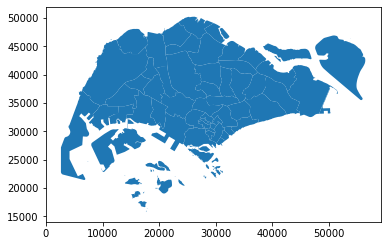

In [11]:
map_df_2.plot()

In [12]:
map_df_2["center"] = map_df["geometry"].centroid
map_center = map_df_2.set_geometry("center")
map_center.head()

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry,center
0,1,PASIR RIS,PR,N,EAST REGION,ER,77F6CE717F532D1A,2014-04-14,40795.4750,40066.2774,22444.999809,1.581071e+07,"POLYGON ((41343.113 40442.099, 41375.108 40432...",POINT (29392.049 29096.752)
1,2,MANDAI,MD,N,NORTH REGION,NR,628E9D38692BCA2F,2014-04-14,24566.8737,45042.7792,17654.485841,1.176684e+07,"POLYGON ((27172.695 46340.676, 27184.405 46308...",POINT (27162.876 31905.732)
2,3,OUTRAM,OT,Y,CENTRAL REGION,CR,F4219E8077ADA3B2,2014-04-14,28972.9596,29477.4882,6159.054476,1.373190e+06,"POLYGON ((29543.029 29762.395, 29604.965 29728...",POINT (27916.927 31967.006)
3,4,MARINA SOUTH,MS,Y,CENTRAL REGION,CR,A2154482A1C94CB5,2014-04-14,31595.8684,29220.1644,5267.582596,1.630477e+06,"POLYGON ((32362.434 29303.478, 32243.087 29216...",POINT (28626.561 31494.905)
4,5,STRAITS VIEW,SV,Y,CENTRAL REGION,CR,559005F6552A085F,2014-04-14,30833.3891,28192.8625,5738.367679,1.129284e+06,"MULTIPOLYGON (((31269.211 28028.951, 30966.166...",POINT (40755.831 39341.743)


In [13]:
# using Singapore subzone-census
# set the filepath and load in a shapefile
map_df_3 = gpd.read_file('../Capstone_Project /lta-road-camera-shp/LTA_Road_Enforcement_Camera.shp')

#data type is a GEOdataframe (not a normal dataframe)
type(map_df_3)

geopandas.geodataframe.GeoDataFrame

In [14]:
# View GEOdataframe
map_df_3.head()

,OBJECTID,UNIQUE_ID,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,geometry
0,1,44.0,38F24C75F665AD47,2015-11-18,36090.0712,31518.2385,POINT (36090.071 31518.239)
1,2,45.0,BE1FD55B03B639F0,2015-11-18,30105.2983,29464.9274,POINT (30105.298 29464.927)
2,3,46.0,48674AE92CFCDCDD,2015-11-18,30151.2148,29536.3389,POINT (30151.215 29536.339)
3,4,47.0,7AA7AF5876455785,2015-11-18,30139.7085,29506.3524,POINT (30139.709 29506.352)
4,5,48.0,4F8E580A4DAE2754,2015-11-18,30157.6359,29554.7141,POINT (30157.636 29554.714)


In [15]:
map_df_3.shape

(254, 7)

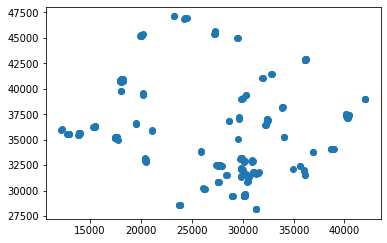

In [16]:
map_df_3.plot()

In [17]:
street_map = gpd.read_file('../Capstone_Project /SingaporeBoundary6513/SingaporeBoundary65.shp')

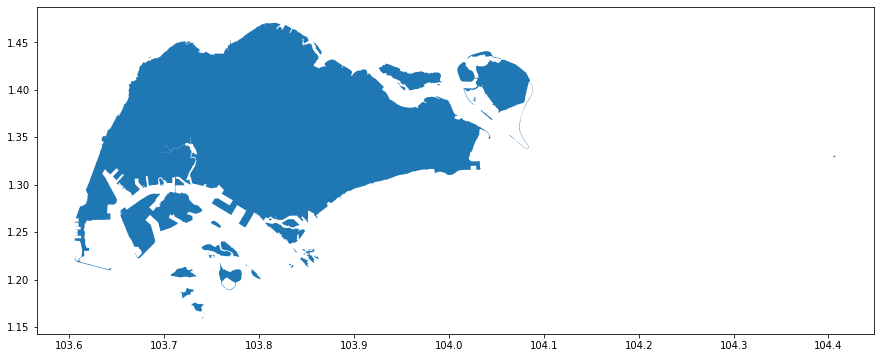

In [18]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [19]:
from pykml import parser
import pandas as pd

filename='../Capstone_Project /lta-road-camera/LTA_Road_Enforcement_Camera.kml'
with open(filename) as f:
    folder = parser.parse(f).getroot().Document.Folder

plnm=[]
cordi=[]
for pm in folder.Placemark:
    plnm1=pm.name
    plcs1=pm.Point.coordinates
    plnm.append(plnm1.text)
    cordi.append(plcs1.text)
    
db=pd.DataFrame()
db['place_name']=plnm
db['cordinates']=cordi

def dump(obj):
    for attr in dir(obj):
        if hasattr( obj, attr ):
            print( "obj.%s = %s" % (attr, getattr(obj, attr)))
#the kml output plnm1 and plcs1 are objects actually which can be viewed using the dump function from [SO](https://blender.stackexchange.com/questions/1879/is-it-possible-to-dump-an-objects-properties-and-methods)

db['Longitude'], db['Latitude'],db['value'] = zip(*db['cordinates'].apply(lambda x: x.split(',', 2)))

db

,place_name,cordinates,Longitude,Latitude,value
0,38F24C75F665AD47,"103.9060115285523,1.301313214309905,0",103.9060115285523,1.301313214309905,0
1,BE1FD55B03B639F0,"103.8522355052062,1.282744773620124,0",103.8522355052062,1.282744773620124,0
2,48674AE92CFCDCDD,"103.852648086767,1.283390591944803,0",103.852648086767,1.283390591944803,0
3,7AA7AF5876455785,"103.8525446970345,1.283119405356261,0",103.8525446970345,1.283119405356261,0
4,4F8E580A4DAE2754,"103.8527057850119,1.283556770359061,0",103.8527057850119,1.283556770359061,0
...,...,...,...,...,...
249,9811FFEC052AEE2A,"103.8003701000606,1.440593305085348,0",103.8003701000606,1.440593305085348,0
250,2F85B7CD8460608C,"103.9136349999638,1.321558508926931,0",103.9136349999638,1.321558508926931,0
251,B4057F016B4780EF,"103.9060346996001,1.301165870123226,0",103.9060346996001,1.301165870123226,0
252,C9A2D6A0F38DB6B8,"103.8520649016075,1.28264681317461,0",103.8520649016075,1.28264681317461,0


In [20]:
db.drop(columns='cordinates', inplace=True)
db.head()

,place_name,Longitude,Latitude,value
0,38F24C75F665AD47,103.9060115285523,1.301313214309905,0
1,BE1FD55B03B639F0,103.8522355052062,1.282744773620124,0
2,48674AE92CFCDCDD,103.852648086767,1.283390591944803,0
3,7AA7AF5876455785,103.8525446970345,1.283119405356261,0
4,4F8E580A4DAE2754,103.8527057850119,1.283556770359061,0


In [21]:
db.drop(columns='value', inplace=True)
db.head()

,place_name,Longitude,Latitude
0,38F24C75F665AD47,103.9060115285523,1.301313214309905
1,BE1FD55B03B639F0,103.8522355052062,1.282744773620124
2,48674AE92CFCDCDD,103.852648086767,1.283390591944803
3,7AA7AF5876455785,103.8525446970345,1.283119405356261
4,4F8E580A4DAE2754,103.8527057850119,1.283556770359061


In [22]:
db.Longitude = db.Longitude.astype(float)
db.Latitude = db.Latitude.astype(float)

In [23]:
decimals = 6
db['Longitude'] = db['Longitude'].apply(lambda x: round(x, decimals))
db['Latitude'] = db['Latitude'].apply(lambda x: round(x, decimals))

In [24]:
db.head()

,place_name,Longitude,Latitude
0,38F24C75F665AD47,103.906012,1.301313
1,BE1FD55B03B639F0,103.852236,1.282745
2,48674AE92CFCDCDD,103.852648,1.283391
3,7AA7AF5876455785,103.852545,1.283119
4,4F8E580A4DAE2754,103.852706,1.283557


In [25]:
geometry = [Point(xy) for xy in zip(db['Longitude'], db['Latitude'])]

In [26]:
geometry[:5]

In [27]:
geo_df = gpd.GeoDataFrame(db,
                         crs = {'init' :'epsg:4326'},
                         geometry = geometry)
geo_df.head()

,place_name,Longitude,Latitude,geometry
0,38F24C75F665AD47,103.906012,1.301313,POINT (103.90601 1.30131)
1,BE1FD55B03B639F0,103.852236,1.282745,POINT (103.85224 1.28275)
2,48674AE92CFCDCDD,103.852648,1.283391,POINT (103.85265 1.28339)
3,7AA7AF5876455785,103.852545,1.283119,POINT (103.85255 1.28312)
4,4F8E580A4DAE2754,103.852706,1.283557,POINT (103.85271 1.28356)


In [28]:
geo_df.shape

(254, 4)

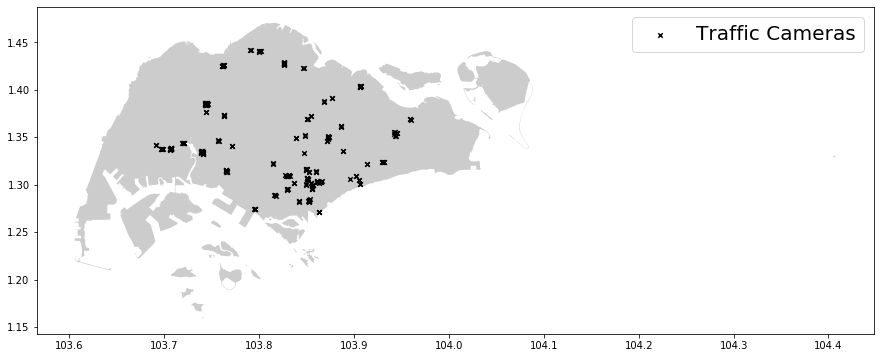

In [29]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 20, color = 'black', marker = 'x', label='Traffic Cameras')
plt.legend(prop={'size': 20})

In [30]:
data = pd.read_csv('../Capstone_Project /road_traffic_condition 3.csv')

In [31]:
data.head()

,year,ave_speed_expressway,ave_speed_arterial_roads*,ave_daily_traffic_volume_entering_city
0,2004,62.7,24.8,246000
1,2005,63.0,27.2,244000
2,2006,61.6,27.1,270400
3,2007,62.4,26.9,278300
4,2008,63.3,26.7,278100
